<br>
<br>

### 데이터 분석 스케치 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;Data Science Competition 2018

---
<img src="DSC_sketch_image/photo-1506617564039-2f3b650b7010.jpg"></img>
<br>
<br>
<br>
# Instacart - 당신은 미래의 충성고객입니까?
### 고객의 최초 4회 주문 기록을 통해 앞으로의 주문 횟수를 일정 범위 내로 예측해보자!
<br>
<br>
<br>



<div style="text-align:right">
<right>**1. 김연진<br>
2. jinny309@gmail.com<br>
3. 김도영 / 김연진 / 최동민<br>**</right>
    
---

<br>
<br>
<br>
# 1. Introduction 

### 1-1. 분석 목적 및 의의
<br>
<br>
약 1년 전, Kaggle에서 진행된 Competition 중 하나인 *<a href="https://www.kaggle.com/c/instacart-market-basket-analysis">Instacart Market Basket Analysis - Which products will an Instacart consumer purchase again?</a>* 는 각 사용자의 마지막 주문에 포함될 재주문 물품을 예측하는 것을 도전과제로 제시했다. Instacart는 미국의 온라인 식품 배송 스타트업으로, 쉽게 말해 대신 장을 봐주는 서비스를 제공하며 현지에서 전문직과 주부들에게 특히 인기가 높다. <br>
<br>
약 2,600여 팀이 도전했던, 이미 오래 전 종료된 이 Competition에 늦게나마 뛰어들겠다는 것은 아니다. 고객이 다음에 재주문할 물건을 예측하는 것도 물론 중요하지만, 사실 더 중요한 것은 고객이 이 서비스를 다시 이용할 것인지의 여부라고 생각했기에 그렇다. 다시 주문하지 않을 고객의 재주문 물품을 예측하는 일은 시간 낭비일 수밖에 없다.<br>
<br>
따라서 우리 팀의 분석 타겟은 '재주문한 물품'이 아닌 <font color='#fb7d07'>**'재주문 횟수'**</font>이다. 데이터에는 각 고객들마다 적게는 4회에서 많게는 100회 이상의 주문 기록이 제공되어 있다.(4회 미만 주문 고객 데이터는 의도적으로 제공되지 않은 것으로 보임.) 모든 고객들이 주문한 최소 횟수인 최초 4회의 주문기록만으로 이후의 주문 횟수를 어느 정도 예측할 수 있다면, 재주문 물품 예측의 대상을 선정하는 일 이외에도 고객의 서비스 이탈 방지 전략을 세우는 일 등에 도움이 되지 않을까? <br>
<br>
▶ 분석 목적 
> - 서비스 진입 초기의 행동 데이터만으로 소비자의 향후 서비스 사용 수준을 예측<br>
> - 충성도 높은 고객의 초기 행동 특성 분석<br>

▶ 분석 의의 
> - 분류 모델을 통해 향후 지속적으로 서비스를 이용할 가능성이 높은 고객을 사전에 선별
> - 충성도 높은 고객을 효율적으로 확보하고 서비스 이탈 방지 전략을 세우는 데에 도움을 줄 수 있음<br>


<br>
### 1-2. 분석 대상 구체화 : 충성고객과 서비스 이탈 시점의 정의
<br>
<br>
분석 대상을 구체화하면서, 주문 횟수를 정확히 예측하는 것보다는 일정 수준 이상으로 서비스를 이용할 고객을 선별하는 것이 더 중요하다고 판단했다. 서비스를 일정 횟수 이상 꾸준히 이용하여 본인의 브랜드 충성도를 입증한 고객이라면, 기업 입장에서는 이후의 구체적인 주문 횟수에 크게 신경쓰지 않고 모두 중요한 고객으로 여길 것이기 때문이다.<br>
<br>
따라서 그러한 고객을 <font color='#fb7d07'>**충성고객**</font>으로 정의하고, 그 기준을 정하여 새로운 Binary classification 문제를 푸는 방향으로 분석을 재설계하였다.<br>
이번 분석에서 정의한 충성고객의 기준은 <font color='#fb7d07'>**각 구매간 간격이 30일 이내이면서 절대적 주문 횟수가 10회 이상**</font>인 경우를 말한다. 이는 일정 기간 내에 일정 횟수 이상 서비스를 이용한 사람들이 진성고객이라는 일반의 상식에 근거한 것이다. 제공되는 정보의 한계 또한 이러한 기준 설정의 이유가 되었다. 고객의 각 주문 간 간격이 30일 이상일 경우, 데이터 상에 ‘30일 이상’으로 표기되어 구체적으로 얼마나 오랜 기간동안 서비스를 이용하지 않았는지 알 수 없었기 때문이다. 따라서 충성도가 떨어지는, 즉 서비스로부터 이탈하였다고 판단하는 기준을 30일로 잡을 수밖에 없었으나, 장보기 어플리케이션이라는 Instacart 사의 서비스 특성상 대단히 불합리한 기준은 아니다. 식료품을 구매하는 행위는 상품의 보관성을 고려한다면 일반적으로 1개월에 1회 이상 행할 수밖에 없는 행위이기에 그렇다. 주문 횟수 10회라는 기준도 다분히 주관적인 기준이지만, 이 또한 객관적인 분류 기준이 존재할 수 없으므로 다른 합리적 기준을 기대하기는 어렵다고 보았다.<br>
<br>
각 주문 당 구매한 상품의 개수를 고려하지 않은 이유는 구매한 물건의 개수가 충성도와 연관되었다고 보기 어렵다는 판단 때문이다. 주문 1회당 상대적으로 적은 개수의 물건을 구매하더라도 정기적으로 수 회 이상 서비스를 이용하는 고객은 충분히 충성도가 높은 고객으로 정의할 수 있다고 판단하였다.  Instacart 사가 제공하는 서비스 특성상, 식료품 구매가 주가 되기에  각 소비자 간 구매하는 상품의 가격대에 큰 차이가 있기 어렵다는 점도 상품 수를 충성도의 기준으로 반영하기 않은 이유가 되었다.  
<br>
▶ '보다 구체화된' 분석 목적 
> - 최초 4회의 구매 행동 데이터만으로 소비자의 향후 충성고객 전환 여부 예측<br>
> - 충성고객의 초기 행동 특성 분석<br>

<br>
### 1-3. 데이터의 약점 : 인구통계학적 변수의 부재, 실제 이탈 시점을 알 수 없는 데이터?
<br>
<br>
분석 대상을 구체화한 후에는 데이터 자체의 문제점에 대해 좀 더 고찰해야 했다. <br>
<br>
먼저, 고객의 인구통계학적 변수인 나이와 성별, 거주지 등의 정보가 제시되지 않은 점이 마음에 걸렸다. 고객 개인의 신상정보 없이도 유의미한 분석이 가능할지 의문이 들었던 것이다. 그러나 <a href="http://fortune.com/2016/03/27/netflix-predicts-taste/">2016년 5월 fortune에 게재된 기사</a>에서 말하는 바는 우리의 염려를 기우로 만들었다. 적어도 Netflix 사의 경우에 한하여, 고객의 거주 정보와 나이, 성별 등의 인구통계학적 정보는 각 고객의 니즈를 예측함에 있어 더 이상 설명변수로 기능하지 않았다는 것이다. 그들은 고객들을 행동 데이터로 파악된 취향에 따라 Cluster로 그룹화 시켰고, 홈페이지의 일부에 고객에 맞는 취향 프로필을 강조하여 컨텐츠 추천에 활용하고 있다. 본격적인 분석에 앞서, 이처럼 <font color='#fb7d07'>**행동 데이터만으로도 충분히 유의미한 분석이 가능**</font>하다는 점을 시사하고자 한다.<br>
<br>
다음으로, 각 고객의 실제 이탈시점을 알 수 없다는 점이 문제가 되었다. Instacart 사가 제공한 데이터는 온전히 재구매 품목 예측만을 위해 생성된 데이터로, 모든 사용자의 지속적 구매가 전제되었기에 이탈 시점을 정확히 알 수 없었기 때문이다. 이를 해결하기 위하여 이 분석의 핵심 idea인 <font color='#fb7d07'>**고객 데이터의 링크화**</font>를 시행하였다. 고객 데이터의 링크화란 고객의 전체 주문기록을 주문 간 간격 30일 이내라는 기준으로 묶어 개별 주문 기록(노드)의 집합인 링크로 정의하는 것이다. 즉, 주문 간격이 30일 이상이라면 서비스 이탈로 간주하고, 간격이 30일 이하인 노드들은 하나의 링크로 정의된다. 한 명의 고객에서 보통 1개 이상의 링크가 관찰되었고, 이탈 시점을 알 수 없는 사용자의 마지막 링크라 하더라도 충성고객 기준을 만족한 경우 분석에 사용하였다. 각 고객의 구매데이터를 구성하는 모든 링크를 분석에 사용할 수도 있겠으나, 하나의 링크 또한 한 명의 사용자를 대표하는 것이 분석의 취지에 맞기에 그 중 가장 많은 노드를 포함하는 링크를 고객의 Unique link로 지정하여 분석하게 되었다.<br>
<br>
<img src="DSC_sketch_image/Link.png"></img>

<br>
▶ '최종' 분석 목적 
> - 각 '링크'의 최초 4회의 구매 행동 데이터만으로 향후 충성고객(링크) 전환 여부 예측<br>
> - 충성도 높은 고객(링크)의 초기 행동 특성 분석<br>

<br>
### 1-4. 가설 : 주로 어떤 사람들이 Instacart의 충성고객이 될까?
<br>
<br>
Instacart는 신선한 식재료를 빠르게 배달하는 서비스이다보니, 아무래도 건강을 신경쓰는 아침형 인간이거나 유기농 식재료를 많이 구매하는 사람이 Instacart의 충성고객이 되지 않을까? 혹은 스스로 장을 보기 어려울 정도로 많은 양의 상품을 구매하는 사람일 수도 있을 것이다.<br>
<br>
이제부터 제공된 데이터를 가공하여 EDA를 진행한 결과와 모델에서 중요하게 쓰인 변수들을 통해 이를 검증해보자.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
# 2. Data  
<br>
<br>
Instacart 사에서 Kaggle에 제공한 데이터는 아래와 같다. 약 20만 명에 달하는 고객들의 주문 데이터만이 제공되며, 전체 주문은 약 342만 건에 이른다. 각 주문과 해당 주문에 포함된 물품은 각각 다른 스프레드시트에 저장되어 있어, 이를 병합하고 개인을 링크화하여 최초 4회 주문 데이터에 대한 정보만 추출하는 작업을 진행하였다. Pandas를 활용한 전처리 과정은 생략하였으며, 결과적으로 분석에 사용된 데이터와 그 변수를 설명하였다.<br>
<br>
출처 : https://www.kaggle.com/c/instacart-market-basket-analysis/data
<br>
<br>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
sns.set() 
%config InlineBackend.figure_format = 'retina' 

sns.set_style(style='white')
sns.set_context(context ='paper')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 50

In [31]:
# 데이터 불러오기.

# 원본 데이터
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

# 가공된 데이터
final_df_modified = pd.read_csv("final_df_modified.csv")

<br>
<br>
<br>
### 2-1. 원본 데이터와 변수 설명
<br>


In [3]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


 - order_id	: 개별 주문 id, 3,421,083건의 데이터
 - user_id	: 개별 고객 id, 206,209명의 비식별화된 사용자
 - eval_set	: Train set과 Test set을 구분
 - order_number	: 개별 고객의 몇 번째 주문인지를 나타내는 값
 - order_dow : 	주문 요일
 - order_hour_of_day : 주문 시간대
 - days_since_prior_order : 이전 주문과의 간격 (0일~30일 이상)

In [4]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


- order_id	: 개별 주문 id
- product_id : 해당 주문에 포함된 상품의 id, 33,819,106건의 개별 상품 구매 데이터
- add_to_cart_order	: 각 상품이 해당 주문에서 장바구니에 담긴 순서
- reordered	: 해당 상품이 이전에 주문된 상품인지의 여부

In [8]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


- product_id : 해당 주문에 포함된 상품의 id
- product_name : 상품명
- aisle_id : 해당 상품의 중분류 id, 134개의 카테고리
- department_id : 해당 상품의 대분류 id, 21개의 카테고리

<br>
<br>
<br>
### 2-2. 분석 대상 데이터와 변수 설명
<br>

In [17]:
final_df_modified.head()

,user_id,unique_link_id,link_length,new_or_not,order_1_dow,order_1_hour_of_day,order_2_dow,order_2_hour_of_day,days_since_prior_order_2,order_3_dow,order_3_hour_of_day,days_since_prior_order_3,order_4_dow,order_4_hour_of_day,days_since_prior_order_4,order_1_organic_count,order_2_organic_count,order_3_organic_count,order_4_organic_count,order_1_first_pick,order_2_first_pick,order_3_first_pick,order_4_first_pick,order_1_second_pick,order_2_second_pick,order_3_second_pick,order_4_second_pick,order_1_num_of_prod,order_2_num_of_prod,order_3_num_of_prod,order_4_num_of_prod,dup_prod_num,reorder_rate,favorite_item,favorite_item_order_num,order_top4_aisle 1,order_top4_aisle 2,order_top4_aisle 3,order_top4_aisle 4,order_top4_aisle 5,order_top4_aisle 6,order_top4_aisle 7,order_top4_aisle 8,order_top4_aisle 9,order_top4_aisle 10,order_top4_aisle 11,order_top4_aisle 12,order_top4_aisle 13,order_top4_aisle 14,order_top4_aisle 15,order_top4_aisle 16,order_top4_aisle 17,order_top4_aisle 18,order_top4_aisle 19,order_top4_aisle 20,order_top4_aisle 21,order_top4_aisle 22,order_top4_aisle 23,order_top4_aisle 24,order_top4_aisle 25,order_top4_aisle 26,order_top4_aisle 27,order_top4_aisle 28,order_top4_aisle 29,order_top4_aisle 30,order_top4_aisle 31,order_top4_aisle 32,order_top4_aisle 33,order_top4_aisle 34,order_top4_aisle 35,order_top4_aisle 36,order_top4_aisle 37,order_top4_aisle 38,order_top4_aisle 39,order_top4_aisle 40,order_top4_aisle 41,order_top4_aisle 42,order_top4_aisle 43,order_top4_aisle 44,order_top4_aisle 45,order_top4_aisle 46,order_top4_aisle 47,order_top4_aisle 48,order_top4_aisle 49,order_top4_aisle 50,order_top4_aisle 51,order_top4_aisle 52,order_top4_aisle 53,order_top4_aisle 54,order_top4_aisle 55,order_top4_aisle 56,order_top4_aisle 57,order_top4_aisle 58,order_top4_aisle 59,order_top4_aisle 60,order_top4_aisle 61,order_top4_aisle 62,order_top4_aisle 63,order_top4_aisle 64,order_top4_aisle 65,order_top4_aisle 66,order_top4_aisle 67,order_top4_aisle 68,order_top4_aisle 69,order_top4_aisle 70,order_top4_aisle 71,order_top4_aisle 72,order_top4_aisle 73,order_top4_aisle 74,order_top4_aisle 75,order_top4_aisle 76,order_top4_aisle 77,order_top4_aisle 78,order_top4_aisle 79,order_top4_aisle 80,order_top4_aisle 81,order_top4_aisle 82,order_top4_aisle 83,order_top4_aisle 84,order_top4_aisle 85,order_top4_aisle 86,order_top4_aisle 87,order_top4_aisle 88,order_top4_aisle 89,order_top4_aisle 90,order_top4_aisle 91,order_top4_aisle 92,order_top4_aisle 93,order_top4_aisle 94,order_top4_aisle 95,order_top4_aisle 96,order_top4_aisle 97,order_top4_aisle 98,order_top4_aisle 99,order_top4_aisle 100,order_top4_aisle 101,order_top4_aisle 102,order_top4_aisle 103,order_top4_aisle 104,order_top4_aisle 105,order_top4_aisle 106,order_top4_aisle 107,order_top4_aisle 108,order_top4_aisle 109,order_top4_aisle 110,order_top4_aisle 111,order_top4_aisle 112,order_top4_aisle 113,order_top4_aisle 114,order_top4_aisle 115,order_top4_aisle 116,order_top4_aisle 117,order_top4_aisle 118,order_top4_aisle 119,order_top4_aisle 120,order_top4_aisle 121,order_top4_aisle 122,order_top4_aisle 123,order_top4_aisle 124,order_top4_aisle 125,order_top4_aisle 126,order_top4_aisle 127,order_top4_aisle 128,order_top4_aisle 129,order_top4_aisle 130,order_top4_aisle 131,order_top4_aisle 132,order_top4_aisle 133,order_top4_aisle 134
0,1.0,1.0,9,1,2.0,8.0,3.0,7.0,15.0,3.0,12.0,21.0,4.0,7.0,29.0,1,1.0,1.0,1.0,77,77,77,77,91,117,23,23,5,6,5,5,12,0.571429,23,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

- user_id : 개별 고객 id
- unique_link_id : 개별 고객의 주문기록 묶음(링크)들 중 가장 많은 주문기록을 가진 링크, 고객 id와 일대일 대응
- <font color='#fb7d07'>**link_length**</font> : 개별 링크 내 주문기록 수, 타겟 변수이며 이를 10이상/미만인 경우로 나누어 이항 변수로 변환하여 예측대상으로 삼음
- new_or_not : 해당 링크가 개인의 첫번째 링크인지의 여부 (이전에 서비스를 이용하였으나 이탈했던 경험이 있는지의 여부)
<br>
<br>
- order_1~4의 dow : Day of week, 즉 최초 1~4번째 주문의 각 주문 요일
- order_1~4의 hour_of_day : 최초 1~4번째 주문의 각 주문 시간
- days_since_prior_order_2~4 : 최초 2~4번째 주문의 이전 주문과의 간격
<br>
<br>
- order_1~4의 organic_count : 최초 1~4번째 주문에 포함된 유기농 상품의 수
- order_1~4의 first_pick : 최초 1~4번째 주문에서 가장 먼저 장바구니에 담은 상품의 중분류 id
- order_1~4의 second_pick : 최초 1~4번째 주문에서 두번째로 장바구니에 담은 상품의 중분류 id
- order_1~4의 num_of_prod : 최초 1~4번째 주문에서 각 주문당 구매한 상품의 수
<br>
<br>
- dup_prod_num : 최초 1~4번째 주문에서 구매한 상품들 중 중복 구매한 상품들이 속한 중분류 id의 수 
- reorder_rate : 최초 1~4번째 주문에서 구매한 전체 상품 수 대비 중복 구매한 상품의 비율
<br>
<br>
- favorite_item : 최초 1~4번째 주문에서 가장 많이 구매한 상품의 중분류 id
- favorite_item_order_num : 최초 1~4번째 주문에서 가장 많이 구매한 상품의 구매 횟수
<br>
<br>
- order_top4_aisle 1~134 : 최초 1~4번째 주문 전체에서 어떤 중분류에 해당하는 상품을 몇 회 구매했는지에 대한 변수, 아래의 Treemap을 통해 각 대분류와 중분류가 어느 정도의 빈도로 분포되어있는지 확인할 수 있다


<img src="DSC_sketch_image/aisle_1.png", width=600, align='left'></img>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
# 3. EDA
<br>
실제 EDA에 들어가기에 앞서, 노드 수가 4 이상인 링크만 분석의 대상이 되므로 그보다 적은 수의 노드를 가진 링크 데이터를 제외하고 충성고객 기준에 따라 해당 링크가 충성 고객인지 아닌지를 표시하는 Loyalty라는 컬럼을 새로 추가하였다. 이제부터 각 링크의 Loyalty를 기준으로 Class를 분류하여 충성고객과 비충성고객의 구매패턴에 어떤 차이가 있는지 살펴볼 것이다.<br>

In [46]:
final_df_modified = final_df_modified[lambda x: x.link_length >= 4]
final_df_modified['Loyalty'] = final_df_modified['link_length'].map(lambda x: 1 if x >= 10 else 0)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
final_df_modified.head()

,user_id,unique_link_id,link_length,new_or_not,order_1_dow,order_1_hour_of_day,order_2_dow,order_2_hour_of_day,days_since_prior_order_2,order_3_dow,order_3_hour_of_day,days_since_prior_order_3,order_4_dow,order_4_hour_of_day,days_since_prior_order_4,order_1_organic_count,order_2_organic_count,order_3_organic_count,order_4_organic_count,order_1_first_pick,order_2_first_pick,order_3_first_pick,order_4_first_pick,order_1_second_pick,order_2_second_pick,order_3_second_pick,order_4_second_pick,order_1_num_of_prod,order_2_num_of_prod,order_3_num_of_prod,order_4_num_of_prod,dup_prod_num,reorder_rate,favorite_item,favorite_item_order_num,order_top4_aisle 1,order_top4_aisle 2,order_top4_aisle 3,order_top4_aisle 4,order_top4_aisle 5,order_top4_aisle 6,order_top4_aisle 7,order_top4_aisle 8,order_top4_aisle 9,order_top4_aisle 10,order_top4_aisle 11,order_top4_aisle 12,order_top4_aisle 13,order_top4_aisle 14,order_top4_aisle 15,order_top4_aisle 16,order_top4_aisle 17,order_top4_aisle 18,order_top4_aisle 19,order_top4_aisle 20,order_top4_aisle 21,order_top4_aisle 22,order_top4_aisle 23,order_top4_aisle 24,order_top4_aisle 25,order_top4_aisle 26,order_top4_aisle 27,order_top4_aisle 28,order_top4_aisle 29,order_top4_aisle 30,order_top4_aisle 31,order_top4_aisle 32,order_top4_aisle 33,order_top4_aisle 34,order_top4_aisle 35,order_top4_aisle 36,order_top4_aisle 37,order_top4_aisle 38,order_top4_aisle 39,order_top4_aisle 40,order_top4_aisle 41,order_top4_aisle 42,order_top4_aisle 43,order_top4_aisle 44,order_top4_aisle 45,order_top4_aisle 46,order_top4_aisle 47,order_top4_aisle 48,order_top4_aisle 49,order_top4_aisle 50,order_top4_aisle 51,order_top4_aisle 52,order_top4_aisle 53,order_top4_aisle 54,order_top4_aisle 55,order_top4_aisle 56,order_top4_aisle 57,order_top4_aisle 58,order_top4_aisle 59,order_top4_aisle 60,order_top4_aisle 61,order_top4_aisle 62,order_top4_aisle 63,order_top4_aisle 64,order_top4_aisle 65,order_top4_aisle 66,order_top4_aisle 67,order_top4_aisle 68,order_top4_aisle 69,order_top4_aisle 70,order_top4_aisle 71,order_top4_aisle 72,order_top4_aisle 73,order_top4_aisle 74,order_top4_aisle 75,order_top4_aisle 76,order_top4_aisle 77,order_top4_aisle 78,order_top4_aisle 79,order_top4_aisle 80,order_top4_aisle 81,order_top4_aisle 82,order_top4_aisle 83,order_top4_aisle 84,order_top4_aisle 85,order_top4_aisle 86,order_top4_aisle 87,order_top4_aisle 88,order_top4_aisle 89,order_top4_aisle 90,order_top4_aisle 91,order_top4_aisle 92,order_top4_aisle 93,order_top4_aisle 94,order_top4_aisle 95,order_top4_aisle 96,order_top4_aisle 97,order_top4_aisle 98,order_top4_aisle 99,order_top4_aisle 100,order_top4_aisle 101,order_top4_aisle 102,order_top4_aisle 103,order_top4_aisle 104,order_top4_aisle 105,order_top4_aisle 106,order_top4_aisle 107,order_top4_aisle 108,order_top4_aisle 109,order_top4_aisle 110,order_top4_aisle 111,order_top4_aisle 112,order_top4_aisle 113,order_top4_aisle 114,order_top4_aisle 115,order_top4_aisle 116,order_top4_aisle 117,order_top4_aisle 118,order_top4_aisle 119,order_top4_aisle 120,order_top4_aisle 121,order_top4_aisle 122,order_top4_aisle 123,order_top4_aisle 124,order_top4_aisle 125,order_top4_aisle 126,order_top4_aisle 127,order_top4_aisle 128,order_top4_aisle 129,order_top4_aisle 130,order_top4_aisle 131,order_top4_aisle 132,order_top4_aisle 133,order_top4_aisle 134,Loyalty
0,1.0,1.0,9,1,2.0,8.0,3.0,7.0,15.0,3.0,12.0,21.0,4.0,7.0,29.0,1,1.0,1.0,1.0,77,77,77,77,91,117,23,23,5,6,5,5,12,0.571429,23,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

<br>
<br>
<br>
### 3-1. 충성고객(링크)의 수
<br>
주어진 조건을 만족한 고객(링크)의 수는 총 116,177명이고, 충성고객은 72890명으로 비충성고객인 43287에 비해 많은 편이다.(약 62%)  데이터의 대상 class 간에 약간의 불균형이 존재하는 것을 확인했으나, 분류기 성능에 영향을 줄 만큼의 차이는 아니라고 판단하여 언더샘플링은 하지 않기로 결정했다.<br>
Class로 구분되지 않은 Link length의 분포를 살펴보면 그 길이가 9인 지점까지는 지속적으로 감소하다가 마지막 링크가 포함되는 기준인 길이 10 이상인 링크부터 그 갯수가 증가한 것을 확인할 수 있다.
<br>

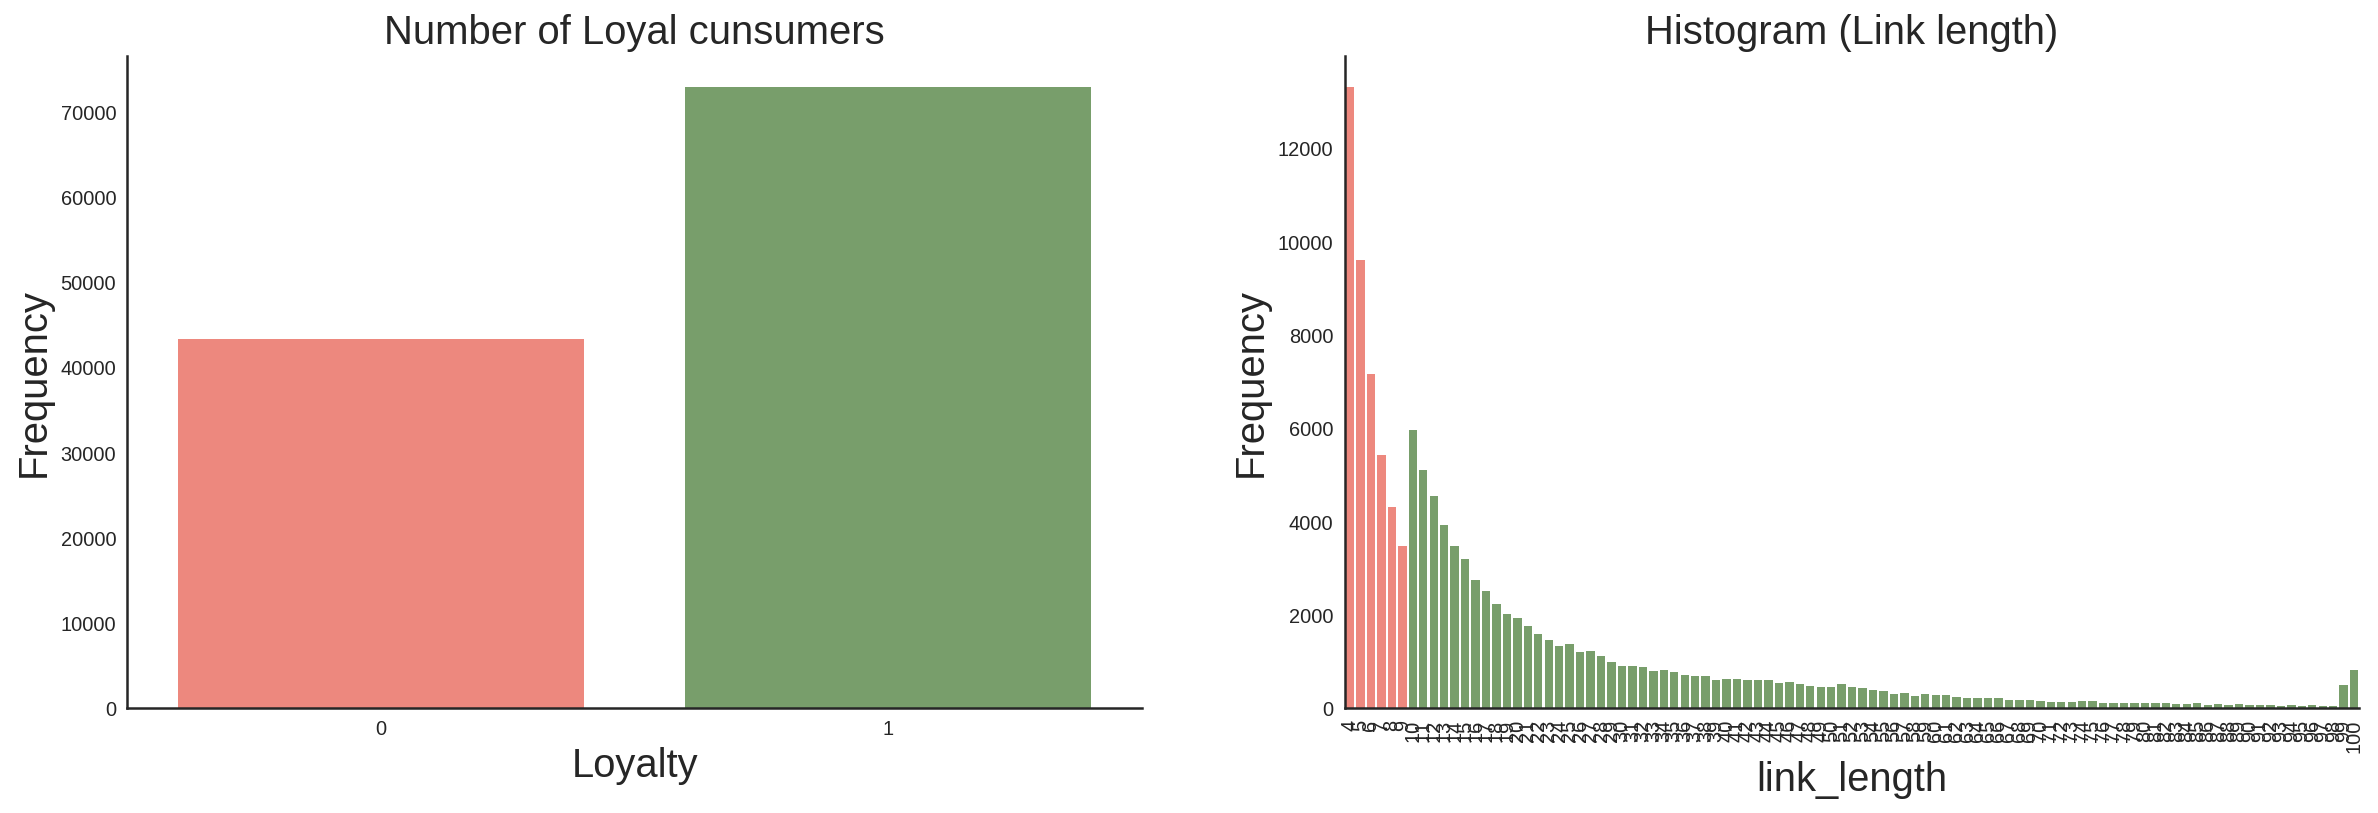

In [107]:

plt.figure(figsize=(20,6))
clrs1 = ['#74a662' if x == 1 else '#ff796c' for x in Loyalty_count.index]
clrs2 = ['#74a662' if x >= 10 else '#ff796c' for x in link_length_count.index]

plt.subplot(121)
Loyalty_count = final_df_modified.groupby('Loyalty')['unique_link_id'].count()
plt.xlabel('loyal or not', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Number of Loyal cunsumers', fontsize=20)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.barplot(x=Loyalty_count.index, y=Loyalty_count.values, palette=clrs1)
sns.despine()

plt.subplot(122)
link_length_count = final_df_modified.groupby('link_length')['unique_link_id'].count()
plt.xlabel('Link length', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Histogram (Link length)', fontsize=20)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
sns.barplot(x=link_length_count.index, y=link_length_count.values, palette=clrs2)
sns.despine()
plt.show()

<br>
<br>
<br>
## 3-2. 미래의 충성고객을 가려낼 주요 변수 찾아보기
<br>


### 3-2-1 . 신규 고객인지의 여부
<br>
먼저 각 class별 신규 고객의 비율을 살펴보았다. 모든 링크가 해당 고객의 신규 링크는 아니므로 이러한 변수 설정이 가능했다. 
주어진 데이터 상으로는 충성고객 중 신규고객의 비율은 약 68%, 비충성고객 중 신규고객의 비율은 약 57%로 나타났고, 따라서 신규고객의 경우 충성고객이 될 가능성이 조금 더 높을 것이라고 예상해볼 수 있다.<br>
<br>

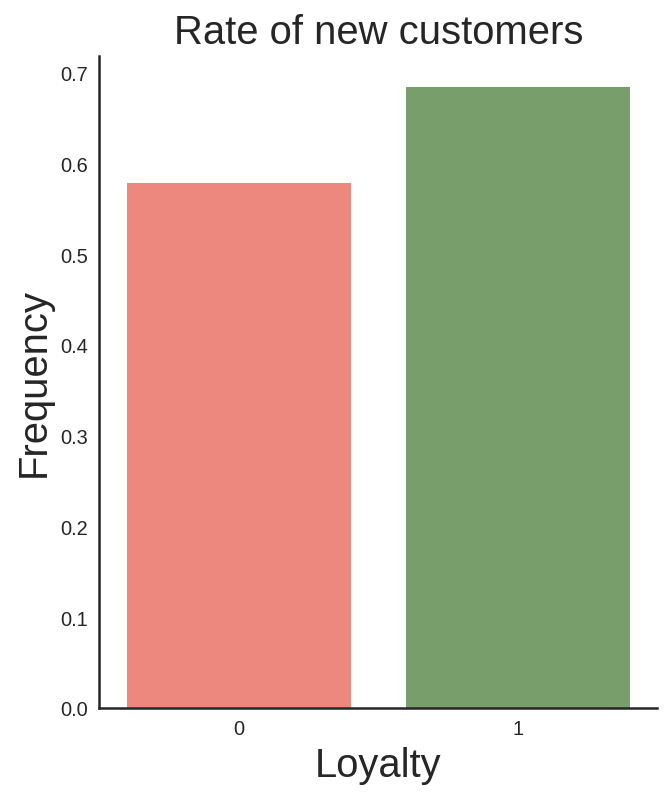

In [51]:
plt.figure(figsize=(5,6))

clrs = ['#74a662' if x == 1 else '#ff796c' for x in new_or_not_df['Loyalty'] ]

plt.title('Rate of new customers', fontsize=20)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.barplot(x='Loyalty', y='rate', data=new_or_not_df , palette=clrs)

plt.xlabel('Loyalty', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
sns.despine()

<br>
### 3-2-2 . 구매시간대
<br>
다음으로 충성고객과 비충성성고객이 주로 각각 어떤 요일의 어느 시간대에 구매하는지 살펴보았다.<br>
두 그룹 모두 주말에 주로 구매가 이루어졌으나, 비충성그룹은 토요일 저녁 시간대에만 구매가 집중된 반면 충성그룹은 일요일 오전에도 주문량이 많은 것을 확인할 수 있다. 따라서 아침형 인간이 충성고객일 확률이 높을 것이라는 가설이 이를 통해 어느 정도 입증되었다. 아래의 히트맵은 2번째 주문에 한하여 그린 그래프이지만, 다른 순번의 주문에서도 이와 매우 유사한 패턴을 관찰할 수 있었다.<br>

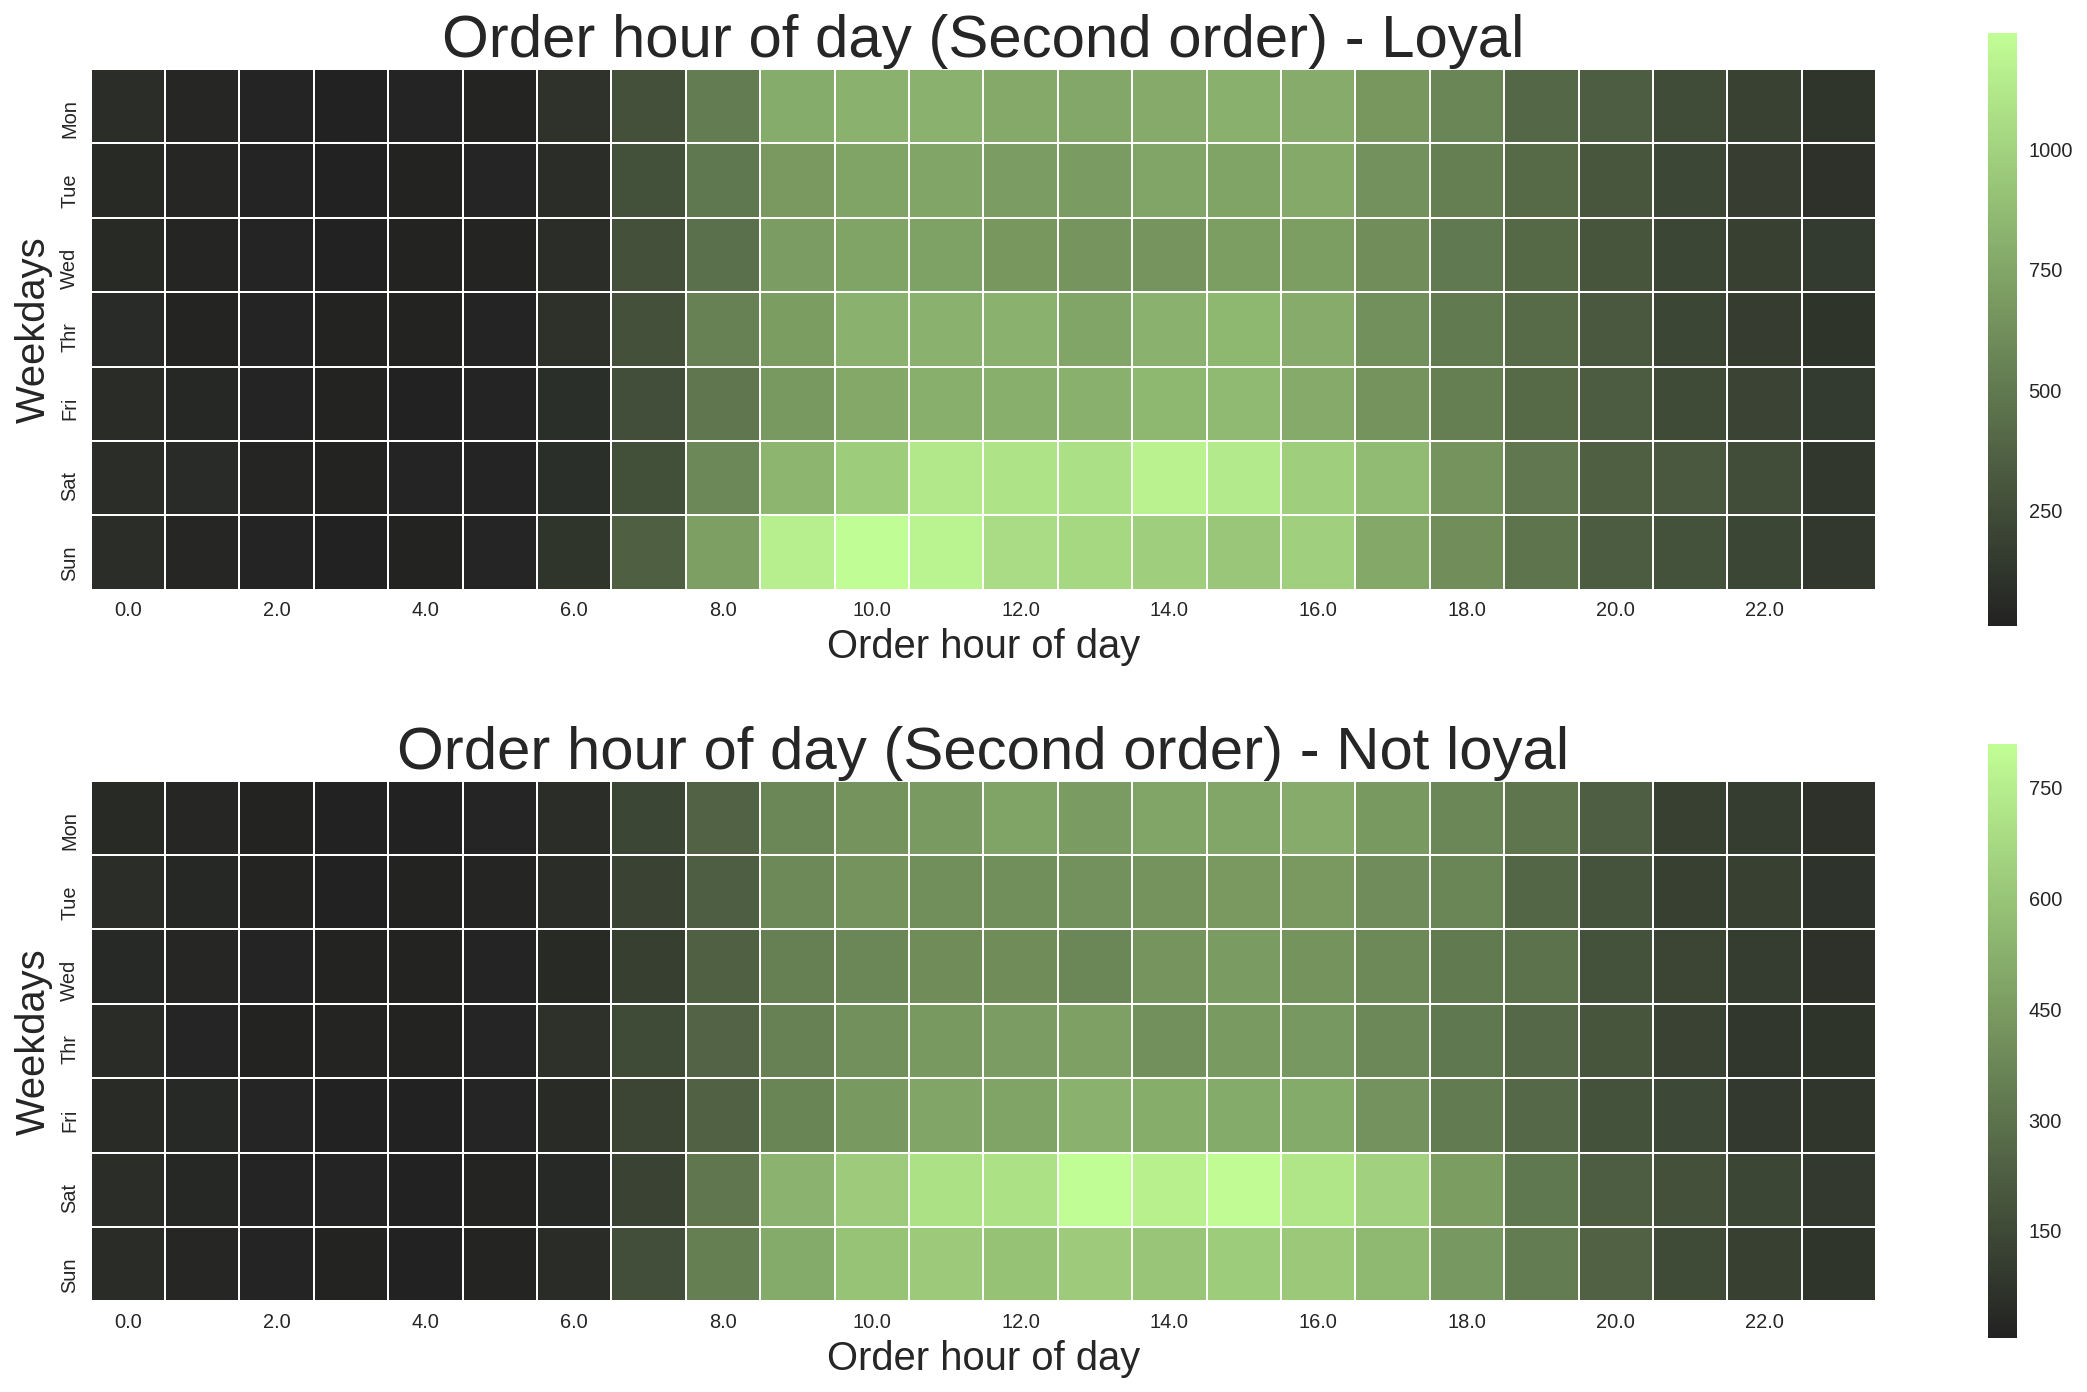

In [74]:
final_df_modified['order_2_dow'] = final_df_modified['order_2_dow'].map(lambda x: "Sat" if x == 0.0 else "Sun" if x == 1.0 else "Mon" if x == 2.0 else "Tue" if x == 3.0 else "Wed" if x == 4.0 else "Thr" if x == 5.0 else "Fri")

plt.figure(figsize=(20,12))

plt.subplot(211)
o2_time_loyal = final_df_modified[lambda x: x.Loyalty == 1].groupby(['order_2_dow','order_2_hour_of_day']).count().unique_link_id.unstack()
o2_time_loyal = o2_time_loyal.transpose()[['Mon','Tue','Wed','Thr','Fri','Sat','Sun']].transpose()
sns.heatmap(data= o2_time_loyal, square=True, cmap=dark_salary, linewidths=.5, xticklabels=2)
plt.xlabel('Order hour of day', fontsize=20)
plt.ylabel('Weekdays', fontsize=20)
plt.title('Order hour of day (Second order) - Loyal', fontsize=30)

plt.subplot(212)
o2_time_not_loyal = final_df_modified[lambda x: x.Loyalty == 0].groupby(['order_2_dow','order_2_hour_of_day']).count().unique_link_id.unstack()
o2_time_not_loyal = o2_time_not_loyal.transpose()[['Mon','Tue','Wed','Thr','Fri','Sat','Sun']].transpose()
sns.heatmap(data= o2_time_not_loyal, square=True, cmap=dark_salary, linewidths=.5, xticklabels=2)
plt.xlabel('Order hour of day', fontsize=20)
plt.ylabel('Weekdays', fontsize=20)
plt.title('Order hour of day (Second order) - Not loyal', fontsize=30)


<br>
<br>
<br>
### 3-2-3. 이전 주문과의 간격, 각 주문 당 유기농 제품 수
<br>
이전 주문 간격의 평균치에서는 충성고객과 비충성고객 사이에 확연한 차이가 있다. 충성고객이 평균적으로 더 짧은 시일 내에 재주문하는 경향이 있으며, 그 평균치도 각각 약 7일과 12일 정도로 큰 차이가 관찰된다.<br>
반면, 유기농 제품 구매에 대해서는 충성고객과 비충성고객 사이에 큰 차이가 없었다. 두 그룹 모두 평균적으로 주문당 2~3개 정도의 유기농 제품을 구매하는 것으로 나타났다.<br>

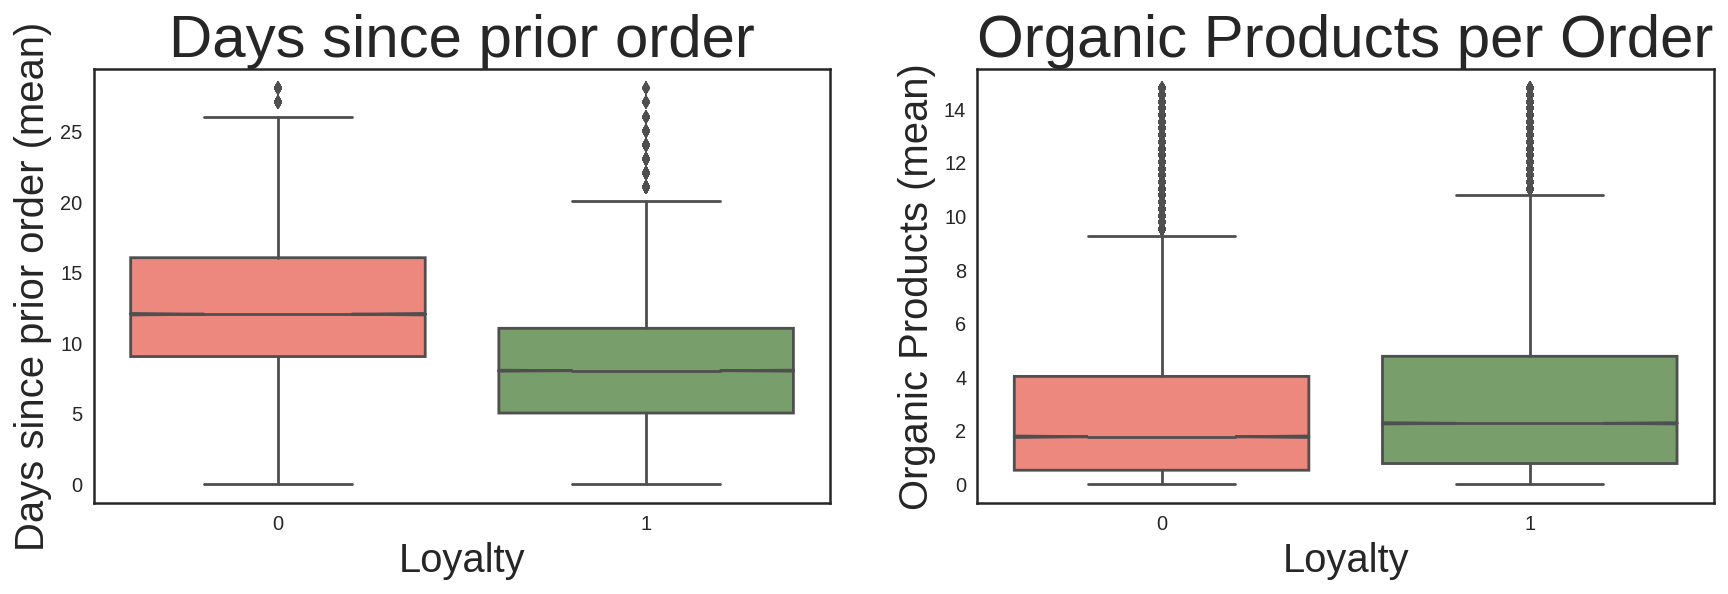

In [109]:
final_df_modified['dspo_mean'] = (final_df_modified['days_since_prior_order_2'] + final_df_modified['days_since_prior_order_3'] + final_df_modified['days_since_prior_order_4'])//3
final_df_modified['organic_mean'] = (final_df_modified['order_1_organic_count']+final_df_modified['order_2_organic_count']+final_df_modified['order_3_organic_count']+final_df_modified['order_4_organic_count'])/4
insta_col = ['#ff796c','#74a662']

plt.figure(figsize=(12,6))
plt.figure().subplots_adjust(right=2)

plt.subplot(121)
sns.boxplot(x = 'Loyalty', y = 'dspo_mean', data = final_df_modified, palette = sns.color_palette(insta_col), notch = True )
plt.xlabel('Loyalty', fontsize=20)
plt.ylabel('Days since prior order (mean)', fontsize=20)
plt.title('Days since prior order', fontsize=30)

plt.subplot(122)
sns.boxplot(x = 'Loyalty', y = 'organic_mean', data = final_df_modified[lambda x: x.organic_mean < 15], palette = sns.color_palette(insta_col), notch = True )
plt.xlabel('Loyalty', fontsize=20)
plt.ylabel('Organic Products (mean)', fontsize=20)
plt.title('Organic Products per Order', fontsize=30)

plt.show()

<br>
<br>
<br>
### 3-2-4 . 각 주문에서 첫번째로 고른 물건, 두번째로 고른 물건
<br>
각 주문에서 첫번째로 고른 물건, 두번째로 고른 물건의 경우 두 집단간 유의미한 차이를 찾기 어려웠다. 빈도 수가 높은 상위 20개 품목을 서로 비교한 결과 대부분의 품목이 일치하는 것으로 확인되었으며, 충성고객이든 비충성고객이든 선호하는 상품의 종류는 상당히 비슷하다는 사실을 알 수 있었다. 다만, 상위 20개 품목 중 서로 겹치는 19개 품목을 제외할 경우 충성고객은 energy granola bars를, 비충성고객은 frozen meals를 자주 구매했다는 작은 차이는 발견할 수 있다. <br>

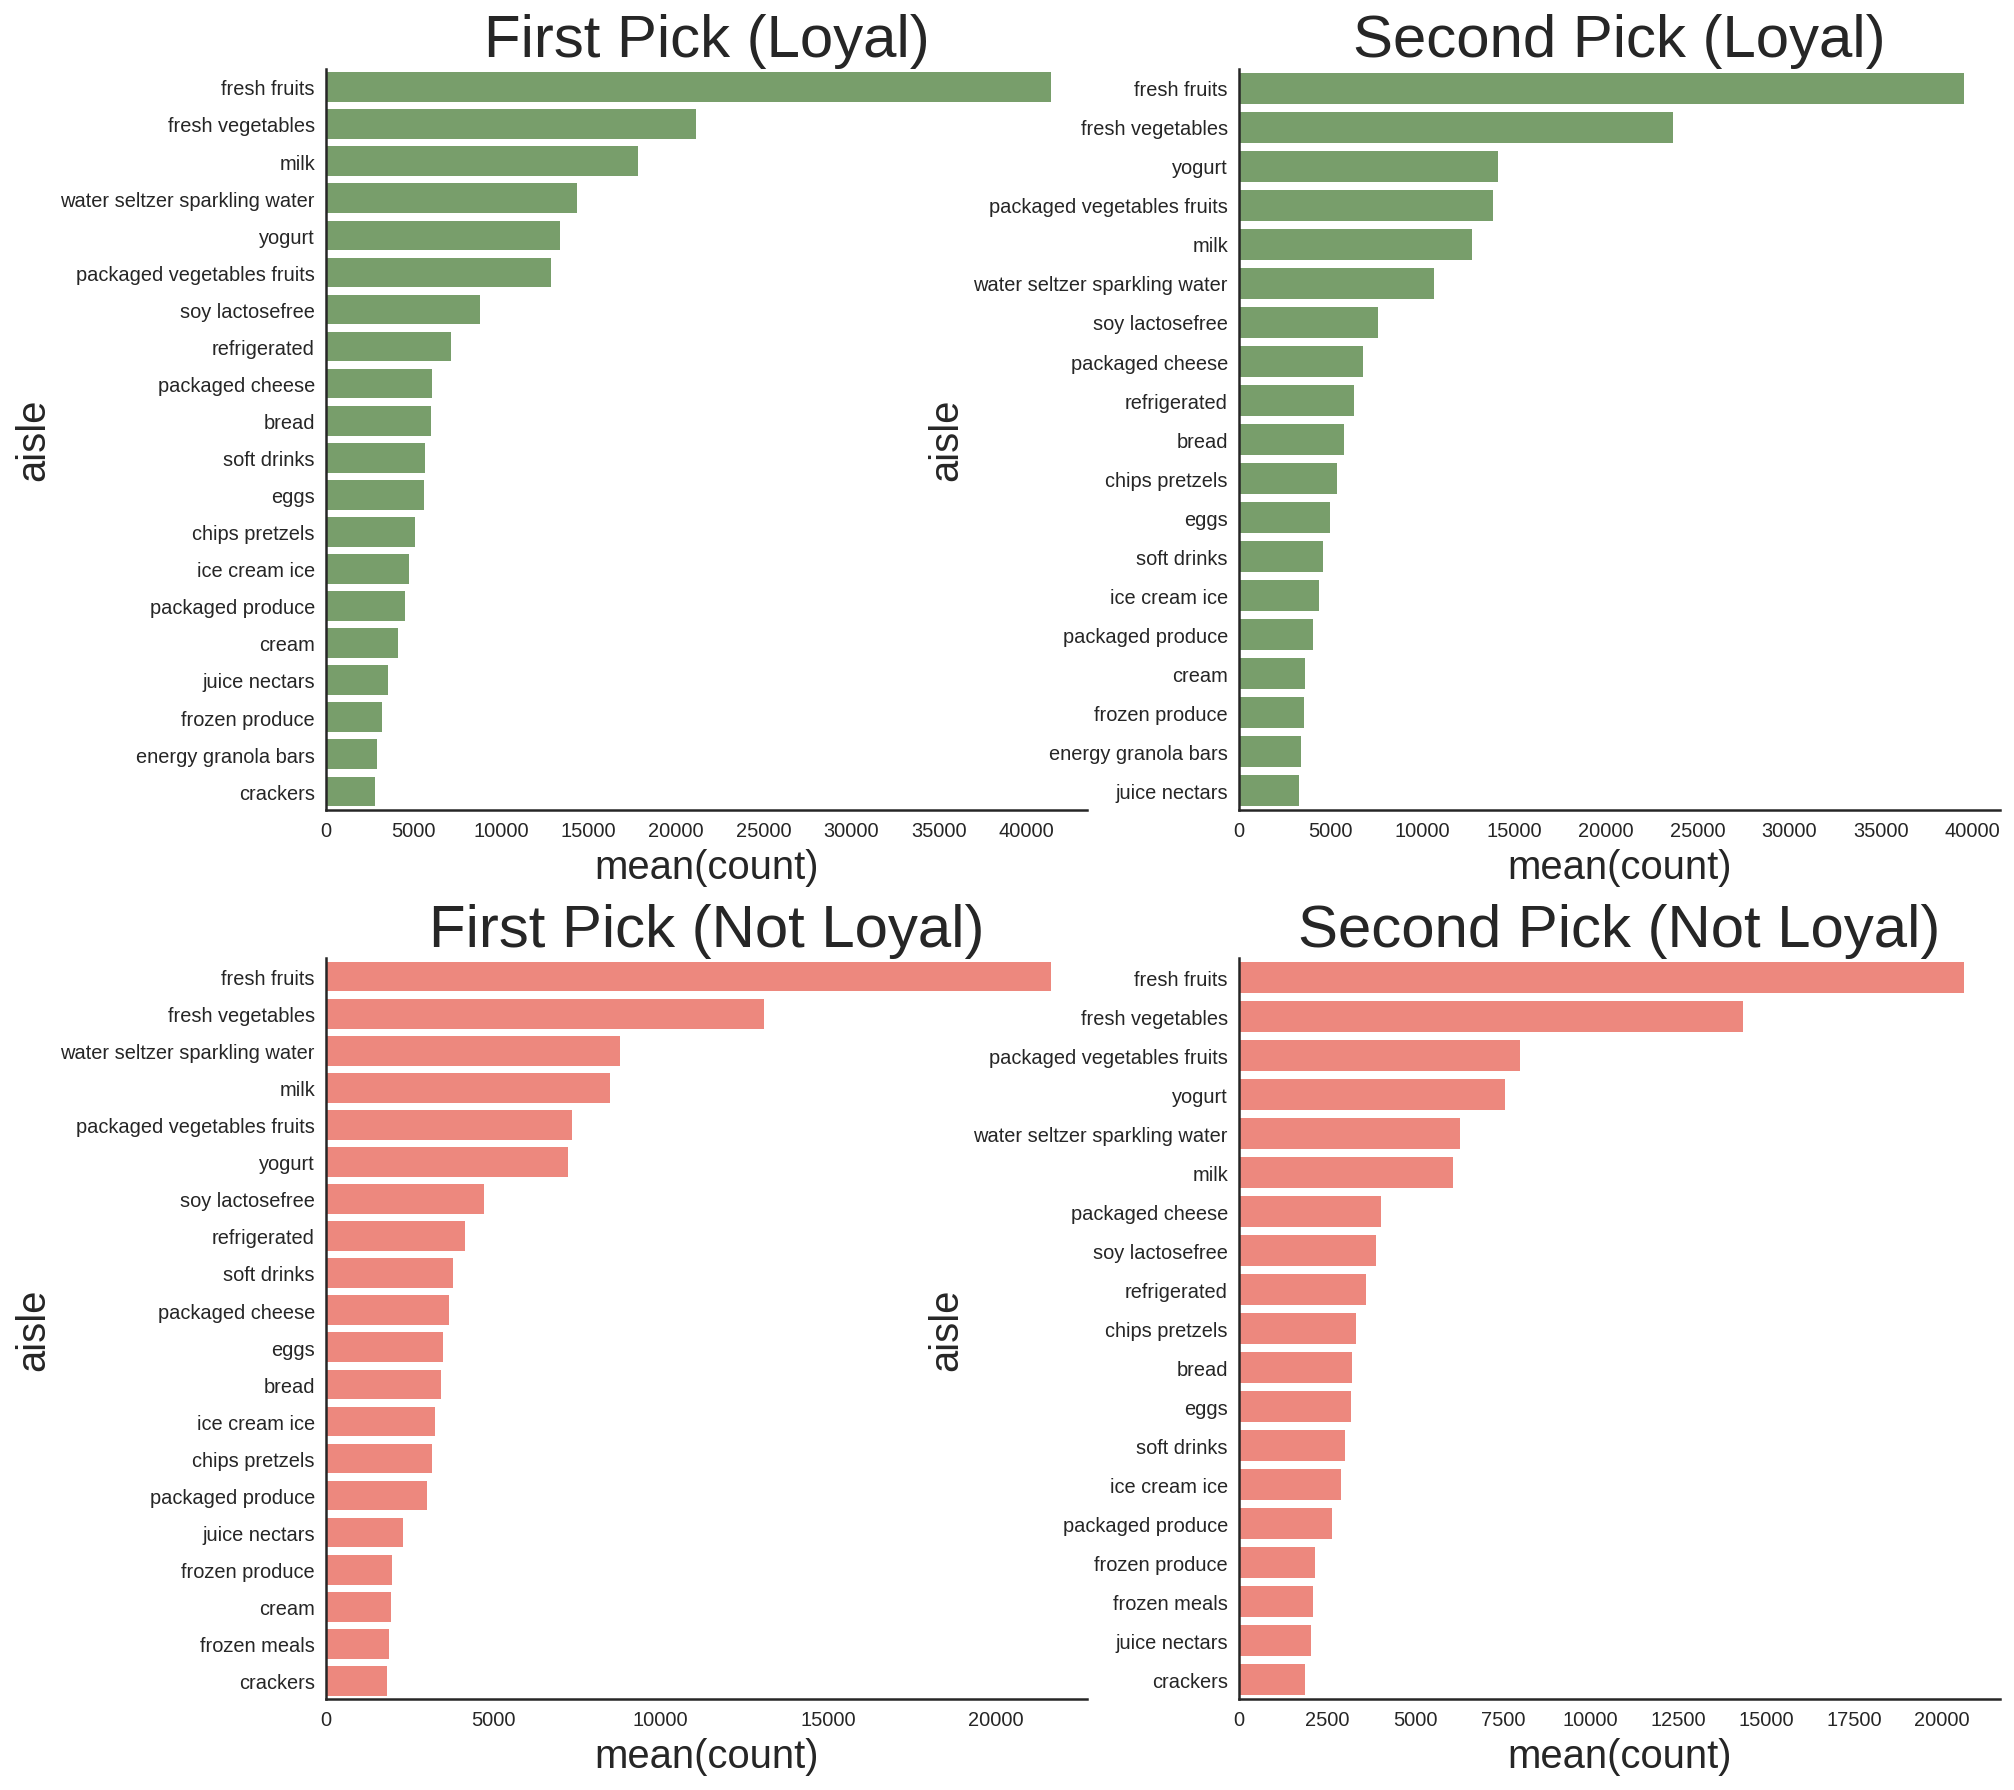

In [115]:
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Aisle name (Top 20)', fontsize=20)
plt.title('First Pick (Loyal)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.barplot(x='count', y='aisle', data=fp_loyal_top20, color='#74a662')
sns.despine()

plt.subplot(222)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Aisle name (Top 20)', fontsize=20)
plt.title('Second Pick (Loyal)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.barplot(x='count', y='aisle', data=sp_loyal_top20, color='#74a662')
sns.despine()

plt.subplot(223)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Aisle name (Top 20)', fontsize=20)
plt.title('First Pick (Not Loyal)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.barplot(x='count', y='aisle', data=fp_not_loyal_top20, color='#ff796c')
sns.despine()

plt.subplot(224)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Aisle name (Top 20)', fontsize=20)
plt.title('Second Pick (Not Loyal)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.barplot(x='count', y='aisle', data=sp_not_loyal_top20, color='#ff796c')
sns.despine()

plt.show()

<br>
<br>
<br>
### 3-2-5 . 각 주문에서 구매한 상품의 수, 가장 좋아하는 상품군을 구매한 횟수
<br>
각 주문에서 구매한 상품의 수, 가장 좋아하는 상품군을 구매한 횟수 모두 두 집단 간 유의미한 차이가 나타나지 않았다.<br>
각 주문에서 구매한 상품의 수는 평균적으로 7~8개, 가장 좋아하는 상품군을 구매한 횟수는 6~7회로 유사했다.<br>

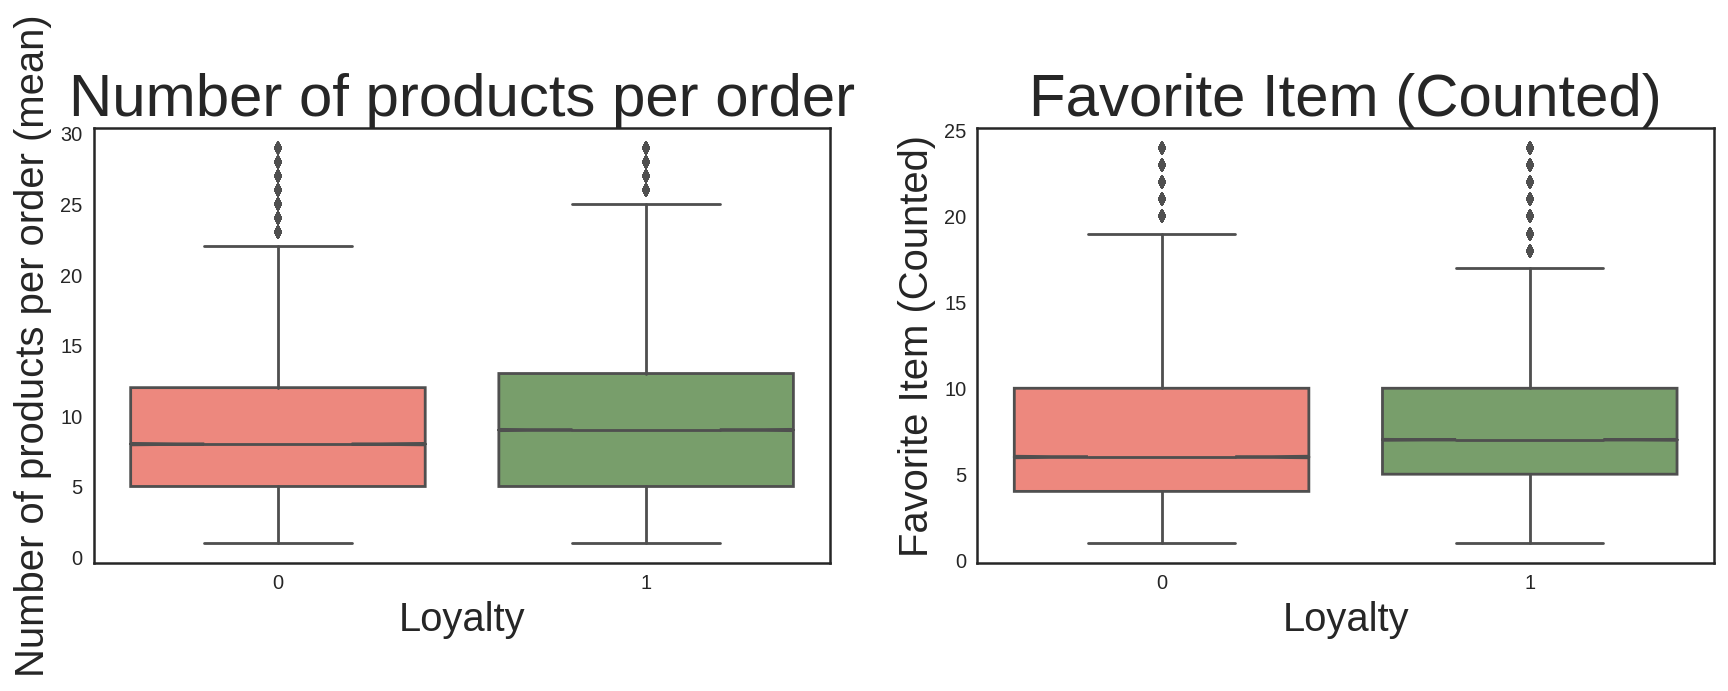

In [116]:
final_df_modified['nop_mean']= (final_df_modified['order_1_num_of_prod'] + final_df_modified['order_2_num_of_prod'] + final_df_modified['order_3_num_of_prod'] + final_df_modified['order_4_num_of_prod'])//4

plt.figure(figsize=(12,6))
plt.figure().subplots_adjust(right=2)

plt.subplot(121)
sns.boxplot(x = 'Loyalty', y = 'nop_mean', data = final_df_modified[lambda x: x.nop_mean < 30], palette = sns.color_palette(insta_col), notch = True )
plt.xlabel('Loyalty', fontsize=20)
plt.ylabel('Number of products per order (mean)', fontsize=20)
plt.title('Number of products per order', fontsize=30)

plt.subplot(122)
sns.boxplot(x = 'Loyalty', y = 'favorite_item_order_num', data = final_df_modified[lambda x: x.favorite_item_order_num <25], palette = sns.color_palette(insta_col), notch = True )
plt.xlabel('Loyalty', fontsize=20)
plt.ylabel('Favorite Item (Counted)', fontsize=20)
plt.title('Favorite Item (Counted)', fontsize=30)

plt.show()

<br>
<br>
<br>
### 3-2-6 . 재주문한 상품 수, 최초 4회 주문 내 전체 재주문율
<br>
재주문한 상품 수, 최초 4회 주문 내 전체 재주문율에도 두 집단 간 차이는 발견되지 않았다. <br>
4회 주문 내에 재주문하는 상품 수는 평균적으로 18~19개, 전체적인 재주문율은 50~60% 정도의 값을 보였다. <br>

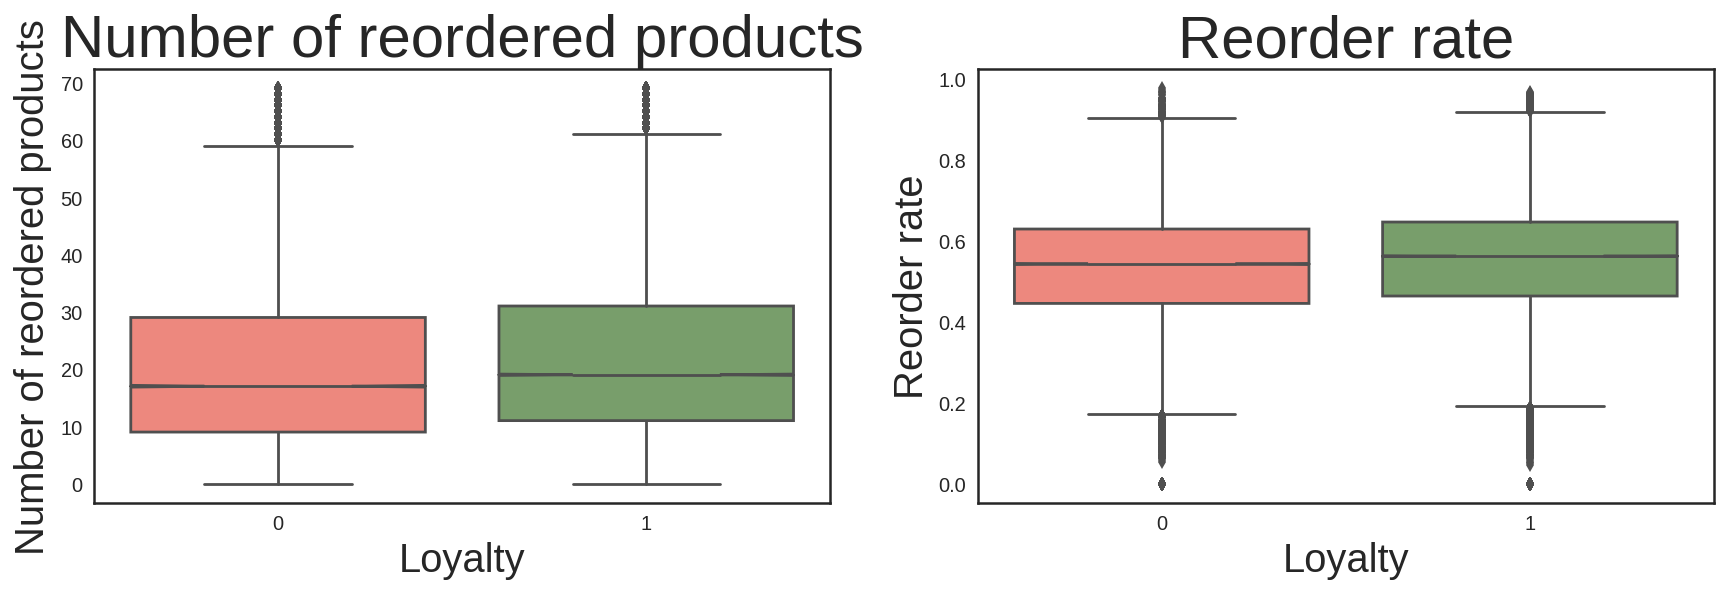

In [117]:
plt.figure(figsize=(12,6))
plt.figure().subplots_adjust(right=2)

plt.subplot(121)
sns.boxplot(x = 'Loyalty', y = 'dup_prod_num', data = final_df_modified[lambda x: x.dup_prod_num < 70], palette = sns.color_palette(insta_col), notch = True )
plt.xlabel('Loyalty', fontsize=20)
plt.ylabel('Number of reordered products', fontsize=20)
plt.title('Number of reordered products', fontsize=30)

plt.subplot(122)
sns.boxplot(x = 'Loyalty', y = 'reorder_rate', data = final_df_modified, palette = sns.color_palette(insta_col), notch = True )
plt.xlabel('Loyalty', fontsize=20)
plt.ylabel('Reorder rate', fontsize=20)
plt.title('Reorder rate', fontsize=30)

plt.show()

<br>
<br>
<br>
### 3-2-7 . order_top4_aisle 1~134
<br>
두 집단 간 품목 구매 패턴 또한 거의 유사했다. 구매량 퍼센티지의 차이가 가장 큰 품목도 각 구매 비율에서 1% 정도의 차이만을 보였다.<br>
그러나 약간의 차이를 보이는 제품군 사이의 유사성은 관찰할 수 있었다. fresh fruits, yogurt, milk, packaged vegetables fruits, energy granola bars, soy lactosefree 처럼 신선한 과채류와 유제품, baby food formula와 같은 영유아 관련 상품은 충성고객 집단이 상대적으로 더 많이 구매한 반면, frozen meals, ice cream ice, soup broth bouillon와 같은 (반)조리 식품군의 경우 비충성고객 집단이 더 자주 구매한 것을 알 수 있다. <br>



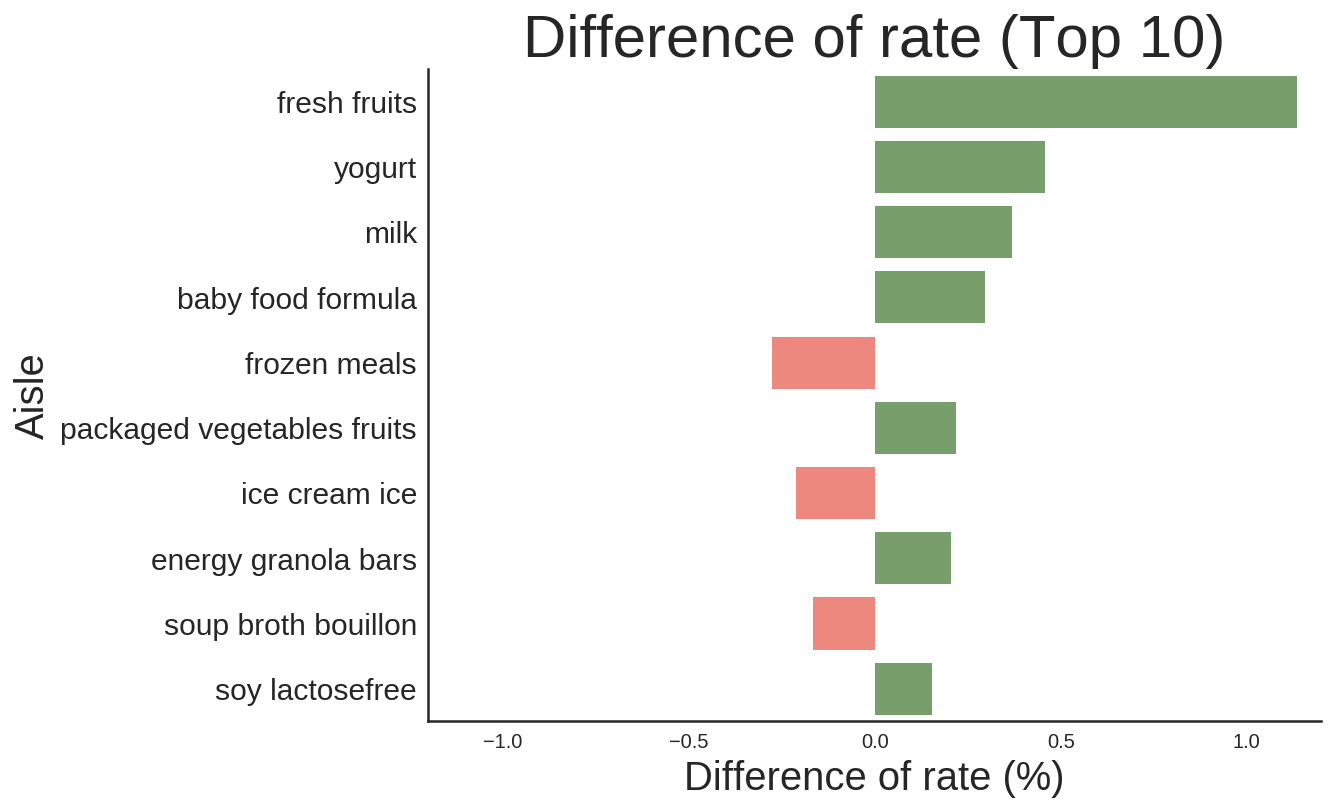

In [77]:
plt.figure(figsize=(8,6))

clrs = ['#74a662' if x >= 0 else '#ff796c' for x in aisle_diff_top10['rate_diff'] ]
sns.barplot(x='rate_diff', y='aisle', data=aisle_diff_top10, palette=clrs)
sns.despine()

plt.xlabel('Difference of rate (%)', fontsize=20)
plt.ylabel('Aisle', fontsize=20)
plt.xlim([-1.2,1.2])
plt.title('Difference of rate (Top 10)', fontsize=30)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 

plt.show()

<br>
<br>
<br>
## 3-3. EDA 결과 : 유의미한 차이를 보인 주요 변수 3가지
<br>
아쉽게도 많은 변수에서 집단 간 두드러진 차이를 관찰하기는 어려웟으나, 그래도 시각적으로 유의미한 차이를 확인할 수 있었던 변수들은 아래와 같다. 따라서 최초 4회 주문데이터만 두고 본다면 <font color='#fb7d07'>**주로 아침에 주문하고, 주문 간격이 짧으며, 신선과채류를 비교적 많이 주문하는 사람**</font>이 미래의 충성고객이 될 확률이 높다고 생각해볼 수 있다.
<br>
> 1. 주문 시간대 : 충성고객은 일요일 오전에 주로 주문 / 비충성고객은 토요일 오전에 주로 주문
> 2. 이전 주문과의 시간차 : 충성고객이 비충성고객에 비해 빠른 시간 내 재주문 (평균적으로 7~8일 후 재주문)
> 3. order_top4_aisle 1~134 : 충성고객은 신선과채류, 영유아용 상품을, 비충성고객은 반조리 식품을 더 자주 구입

<br>
이제 주어진 데이터로 충성고객을 가려내는 분류기를 생성하고, 생성된 분류기 또한 위의 3개 타입의 변수들을 주요 분류 기준으로 사용하는지 살펴보자.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
# 4. Models
<br>

## 어떤 모델을 쓸 것인가?
<br>
다양한 Classifier들 중 어떤 모델을 분석에 사용할지 결정해야 했다. 일단 가장 대표적인 Classifier로는 로지스틱 회귀모형이 있을 것이다. Naive Bayes, Decision Tree와 같은 비교적 단순한 모델, 대표적인 앙상블 모델인 Random forest, XGboost 등의 모델도 분석에 자주 쓰이는 일반적인 모델이다. <br>
<br>
이번 분석에서는 이처럼 다양한 모델을 사용하고 그 성능을 비교해보려 했으나, 문제는 우리가 편집한 데이터셋에 <font color='#fb7d07'>**범주형 변수가 너무 많고, 그 범주(Category)의 level 수 또한 적지 않았다는 것**</font>이었다. 범주형 변수를 스스로 처리할 수 없는 모델은 학습 이전에 범주형 변수를 어떤 방식으로든 encoding하는 과정을 거쳐야만 하는데, 주로 쓰이는 one-hot encoding은 level의 수가 많을 경우 데이터 차원이 지나치게 커진다는 문제가 있다. 그리고 데이터의 차원이 지나치게 커질 경우, 트리 기반 모델의 학습 성능은 일반적으로 떨어지는 것으로 알려져있다.<br>
<br>
예를 들어 위 데이터셋의 first_pick, second_pick과 같은 변수만 보더라도 그 안의 level은 중분류 범주의 수인 134개이다. (각 고객은 134개 상품 중분류 중 하나를 선택하는 셈이다.) 이를 one-hot encoding을 사용해 변환할 경우 각 변수당 134개의 새로운 Dummy Variable이 생성되는데, 이러한 변수가 일단은 8개가 존재하므로 <font color='#fb7d07'>**단 8개의 변수만으로 134X8 = 1072개의 새로운 변수가 생성**</font>되는 것이다.<br>  

Scikit-learn에서 제공하는 대부분의 모델은 범주형 변수의 encoding이 필요했고, 차원 증가로 인한 성능 저하 및 계산량 증가를 고려하여 결국 일반적으로 사용되는 모델과는 다른 모델을 사용해야만 한다는 결론을 내렸다. <br>
<br>
<br>

## Categorical feature handling : Catboost와 LightGBM
<br>
문제는 결국 범주형 변수를 다루는 다른 방법을 찾는 것이었고, 최근 공개된 Gradient Boosting 알고리즘에 이미 그 답이 있었다.<br>
Catboost와 LightGBM은 각각 2017년 1월과 4월에 공개된 오픈소스로, 각각 다른 방식으로 범주형 변수를 encoding하며 그 과정이 모델 내에서 자동으로 처리되기에 분석자가 범주형 변수를 직접 encoding하지 않아도 되는 장점이 있다.<br> 
<br> 
>### Catboost<br> 
CatBoost는 의사 결정 트리(Decision Tree)를 기반으로 Gradient Boosting을 사용하는 머신러닝 알고리즘이다. Yandex 연구원이 개발한 MatrixNet 알고리즘의 후속 제품이다. 이 모델은 Categorical Features를 지원한다. Categorical Feature를 지정해준 뒤 모델에 input으로 넣으면 모델이 내부적으로 Categorical 변수를 Numeric 변수로 변환하여 모델에 적용하게 된다. Categorical 변수는 전체 변수 중에 해당 변수가 차지하는 비율을 반영하여 Numeric 변수로 변환된다. Overfitting Detector를 제공하여 오버피팅이 발생하는 것이 발견되면 일찍 트레이닝을 종료되어 과적합을 방지하는 등의 특징을 가지고 있다.

<br> 
>### LightGBM <br>  
 LightGBM은 loss를 최소화하는 것을 최대 목표로하는 leaf-wise tree growth 방법을 따르는 트리 계열 앙상블모델이다. LightGBM은 다른 모델에 비해 범주형 변수가 많을 경우 좋은 성능을 보이는데, 이는 범주형 변수를 연속형 변수로 나타낼 때 k개의 종류가 있는 범주형 변수를 k개의 새로운 변수로 나타내는 것이 아니라 최적의 2개의 집합으로 분할하기 때문이다.<br>
 <br> 
 LightGBM이 갖는 다른 트리 계열 모델과의 가장 큰 차이점은 데이터 샘플링에 있다. LightGBM은 크게 GOSS와 EFB라는 방법을 이용한다. GOSS(Gradient-based One-Side Sampling)는 데이터 인스턴스의 중요도를 나타내는 gradient 기준 상위 a X 100%의 인스턴스와 나머지 인스턴스 중 임의로 b X 100%를 추출한 후 상수 (1 - a)/b를 곱해주어 영향력을 높여준 인스턴스를 이용하는 방법이다. 그리고 EFB(Exclusive Feature Bundling)는 상호 배타적인 특징들을 묶어주어(bundling) 하나의 특징으로 만들어줌으로써 모델 성능에 영향을 미치지 않고 학습 속도를 높이는 방법이다.
<br> 

<br>
<br> 
## 4-1. Hyper-parameter Tuning : 최종 모델
<br> 
Gradient descent/ascent method를 사용하여 학습하는 모델의 경우 Iteration 수, 학습 속도 등 여러 하이퍼파라미터들을 사용자가 직접 지정해야 한다는 문제가 있다. 여기서는 가장 일반적인 Grid search를 사용하여 하이퍼파라미터를 최적화하였으며, 그 결과로 도출된 최적 모델은 아래와 같다. 튜닝한 하이퍼파라미터의 목록과 그 의미는 표로 정리하였다.<br> 
<br> 
> ### Catboost 최종 모델 
(처음부터 0과 1로 Binning된 class에 대한 Binary Classification 접근방식)<br><br>
**CatBoostClassifier(
    iterations=180, 
    learning_rate=0.1, 
    depth=7, 
    l2_leaf_reg=1,
    random_strength=1,
    bagging_temperature=1 )**

<br> 
> ### LightGBM 최종 모델 
(Regressor로 예측된 링크 내 노드 수를 Binning하여 아웃풋으로 활용하는 접근방식)<br><br> 
**LightGBM( num_leaves = 32, learning_rate = 0.1, feature_fraction = 0.9, bagging_fraction = 0.9,  max_depth = 4, min_data_in_leaf = 200, num_iterations = 200, objective = regression)**


&emsp;&emsp;**Catboost 주요 하이퍼파라미터** &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **LightGBM 주요 하이퍼파라미터** 
<br>
<img src="DSC_sketch_image/cat_param.png", width=450, align='left'></img>
<img src="DSC_sketch_image/gbm_param.png", width=450, align='right'></img>

<br>
<br> 
## 4-2. 분석 결과 : 과연 각 모델은 미래의 충성고객을 얼마나 잘 맞추었을까?
<br> 
각 모델의 metric별 최종 스코어는 아래와 같다. 3개 지표 중 2개의 지표에서 LightGBM이 더 나은 성능을 보이며, F1 score의 경우 그 차이가 미미하므로 결과적으로 이번 분석에서만큼은 **LightGBM의 판정승**을 선언한다. 클래스 간에 약간의 Imbalance가 있는 데이터로 산출된 결과이기에 Accuracy로 분석 결과를 일부 대표하는 것이 조금은 조심스럽지만, 최초 4회의 주문 정보만으로도 미래의 충성고객과 비충성고객을 어느 정도 구별할 수 있다는 사실은 흥미롭다. 
<br> 
>### Catboost 최종 Score <br> 
Accuracy: <font color='#fc5a50'>70.6180%</font><br>
AUC: <font color='#fc5a50'>0.75246</font><br>
F1 Score: <font color='#069af3'>0.78248</font><br>

<br>
>### LightGBM 최종 Score<br>
Accuracy : <font color='#069af3'>78.5711%</font><br>
AUC : <font color='#069af3'>0.80027</font><br>
F1 Score : <font color='#fc5a50'>0.77678</font><br>

<br> 
각 모델의 feature Importance 상위 15개 feature는 아래와 같다. 트리 기반 앙상블 모델의 경우 선형회귀나 로지스틱 회귀처럼 계수 값을 직접 알 수는 없지만, 모델 내 개별 tree에서 node를 split하는 기준으로 어떤 변수가 많이 쓰였는지를 통해 해당 변수의 중요성을 확인할 수 있다. <br>
<br> 
먼저 Catboost의 경우, EDA를 통해 확인했던 결과와 어느 정도 일치하는 결과를 보여주었다. 각 주문간 간격과 주문시간대, 주로 주문한 상품(신선과채류, 아이스크림 등의 가공식품)과 관련된 변수가 중요도 상위 15개 변수 중 12개를 차지했다. 그러나 재구매율, 신규진입여부, 유기농상품 구매 수 등 EDA에서 큰 차이를 발견하지 못했던 변수도 개별 Tree에서 중요하게 사용되었다는 점은 의외였다. days_mean, days_std, organic_mean 등의 변수는 각각 연관된 변수들 간의 상관성을 모델에 반영하기 위해 연속된 4개 주문에서의 값의 평균,표준편차를 변수로 반영한 것이다. 반영된 변수의 중요도 자체는 높았으나 모델의 예측력에 미치는 영향은 미미했다. <br>
<br> 
반면, LightGBM의 결과는 EDA로 예상했던 바와 매우 달랐다. 각 주문에서 고른 첫번째/두번째 물건이라는 변수 집단이 가장 중요하게 쓰인 것이다. 전체 빈도수로 살펴보았을 때는 충성고객과 비충성고객 간 차이를 거의 찾기 어려웠으나, LightGBM에서의 범주형 변수 encoding 방식이 상당히 유효하게 작용한 것으로 보인다. 그 외의 변수로는 역시 주문 간 간격, 주문 시간대가 유의하게 사용되었으며, 신규진입여부와 가장 많이 구매한 상품군 변수도 EDA 결과와는 다르게 중요하게 쓰인 것으로 확인되었다. <br> 
<br> 

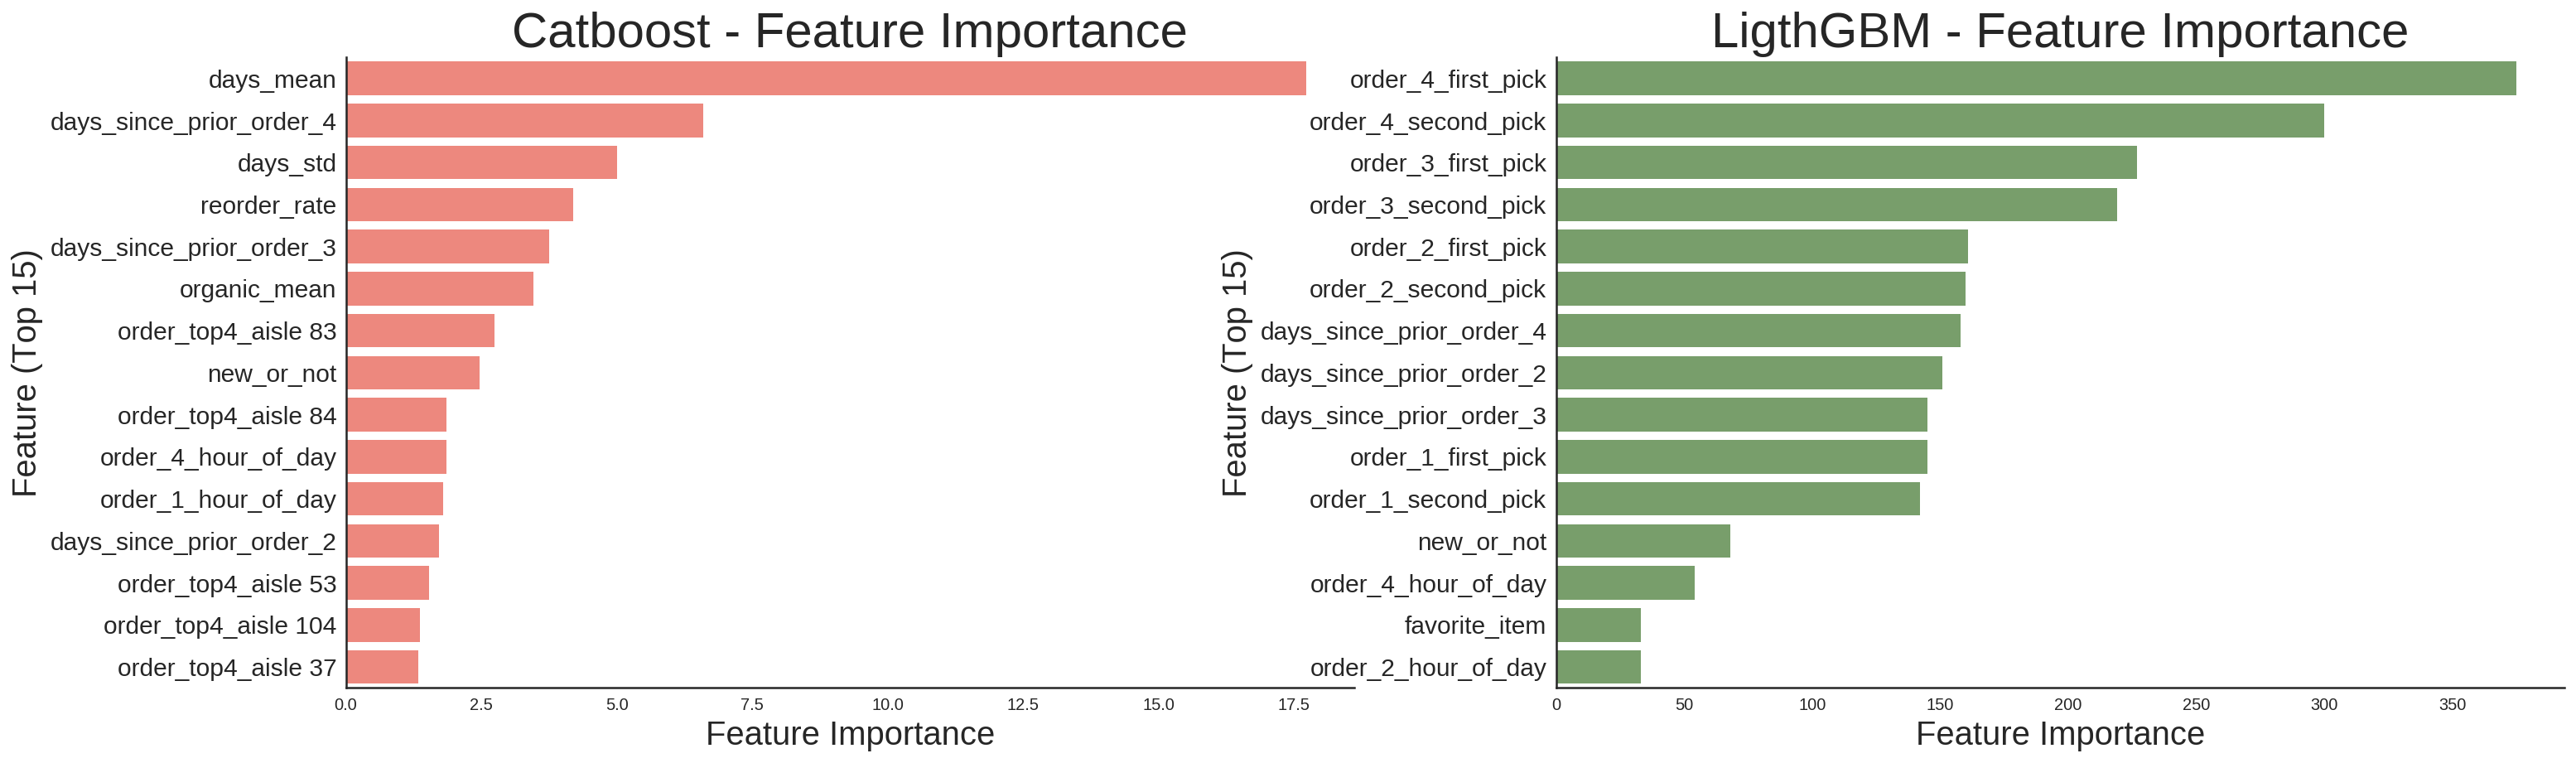

In [25]:
plt.figure(figsize=(24,7))

plt.subplot(121)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 
sns.barplot(x='importance', y='name', data=cat_fi, color='#ff796c')
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('Feature (Top 15)', fontsize=20)
plt.title('Catboost - Feature Importance', fontsize=30)
sns.despine()

plt.subplot(122)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=15) 
sns.barplot(x='importance', y='name', data=gbm_fi, color='#74a662')
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('Feature (Top 15)', fontsize=20)
plt.title('LigthGBM - Feature Importance', fontsize=30)
sns.despine()

plt.show()

<br>
<br> 
## 4-3. Something else? AR! 
<br>
여기까지 EDA와 각 모델의 Feauture importance를 종합하여 충성고객이 될 가능성이 높은 고객의 행동특성을 살펴보았다. 그러나 이러한 두 가지 방법 이외의 고객행동특성 관찰방법은 없는 것일까? 분석이 어느 정도 마무리된 후 이를 고민하던 중, 데이터마이닝 수업에서 배웠던 연관규칙분석(AR)이 문득 떠올랐다. <br>
<br> 
연관규칙분석(AR)이란, 어떤 아이템 집합이 상대적으로 빈번히 발생하는가를 알려주는 일련의 규칙들을 생성하는 알고리즘이다. 경영학에서는 장바구니 분석(Market Basket Analysis)으로 널리 알려져 있는 방법론으로, 소비자들의 구매이력 데이터 등을 토대로 “X 아이템을 구매하는 고객들은 Y 아이템 역시 구매할 가능성이 높다”는 식의 결론을 내는 것이 목적이다. 이러한 연관규칙은 X -> Y와 같이 표현된다.<br>
<br>
이번 분석에서는 보다 작은 크기의 규칙에서의 빈발집합만을 고려하는 Apriori alogrithm을 사용하여 빈발집합을 규정하고, 빈발 집합 내 일정 수준 이상의 Confidence값을 갖는 규칙을 도출하였다. 이미 도출된 결과와 대단히 다른 방향의 행동특성을 발견하게 된 것은 아니지만, 분석을 통해 알게 된 사실과 어느 정도 부합하는 규칙들을 확인할 수 있었다.

<img src="DSC_sketch_image/apriori.png", width=450, align='left'></img>

<br> 
### 4-3-1. 도출된 고유연관규칙과 그 차이점
<br> 
134개의 중분류 기준으로 묶인 제품들의 구매 빈도 matrix를 활용하여 AR 분석을 진행하였다. 약 11만 명의 분석 대상 고객(링크)이 최초 4회의 주문에서 해당 중분류에 해당하는 물건을 구매했을 경우 1, 그렇지 않을 경우 0으로 표기된 데이터셋으로 이해할 수 있다.<br>
<br>
각 집단 별 빈발 집합의 최소 support 값은 0.07로 지정하였고, lift 값을 기준으로 선정된 규칙들 중 최소 confidence 값인 0.6을 만족하는 결과만을 규칙으로 인정하였다. 결과적으로 support 값을 기준으로 집단별 상위 100개의 규칙을 추출하였으며, 집단만의 고유 규칙을 관찰하고자 집단 간 동일한 규칙은 모두 제거하였다. 제거된 규칙의 수는 전체 200개 중 188개로, 이는 식료품 위주의 물건을 판매하는 플랫폼의 특성 상 충성도에 관계없이 유사한 니즈를 가진 소비자들이 이용하기 때문인 것으로 추측된다. <br>
<br>


먼저 비충성고객의 고유 규칙을 살펴보면, 규칙의 조건절에 들어있는 상품이 대부분 가공되었거나 조리된 식품인 것을 확인할 수 있다. 파스타 소스, 주스, 조리된 육수, 생수 등 간편하게 조리하거나 바로 먹을 수 있는 상품을 구매하는 것이다. 

<img src="DSC_sketch_image/ar_rule_2.PNG", width=800, align='left'></img>

반면, 충성고객의 고유규칙은 비충성고객과는 다르다. 규칙의 조건절을 볼 때, 이미 가공된 식품을 구매한 비충성고객과는 달리 유제품과 견과류 등 가공되지 않은 식재료를 구매하는 고유규칙을 확인할 수 있다. 

<img src="DSC_sketch_image/ar_rule_3.PNG", width=800, align='left'></img>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
# 5. Conclusion
<br>

## 5-1. 결과 요약<br>

### ▶ 분석 결과 
> - 각 '링크'의 최초 4회의 구매 행동 데이터만으로 향후 충성고객(링크) 전환 여부 예측?
    - <font color='#fb7d07'>**약 78%의 정확도**</font>로 미래의 충성고객과 비충성고객을 구분할 수 있음. (LightGBM)<br><br>
> - 충성도 높은 고객(링크)의 초기 행동 특성 분석?
    - 일반적으로 <font color='#fb7d07'>**주문 간 간격이 짧고, 일요일 오전에 주문하며, 가공식품에 비해 견과류와 유제품, 과채류를 선호하는 신규 고객.**</font>
    - 유기농 제품을 조금 더 많이 구매하거나 재구매율이 약간 높을 경우에도 미래 충성고객 전환을 기대해볼만 함.
    - <font color='#fb7d07'>**장바구니에 첫번째, 두번째로 담기는 물건**</font>으로도 미래의 충성고객 전환 여부를 파악할 수 있음.<br>

## 5-2. 한계 및 발전방향
<br>
데이터 자체의 한계를 언급하지 않을 수 없다. 만약 30일 이상의 주문 간 간격이 정확히 명시되었거나 3개월 이상 서비스를 이용하지 않은 고객의 데이터가 있었다면 좀 더 높은 정확도를 보이는 모델을 도출할 수 있었을 것이다. 플랫폼의 성격이 지나치게 명확한 것 또한 분석을 어렵게 했다. 주로 농산품 등의 식료품을 취급하는 서비스 특성상 모든 고객들의 상품 선호가 유사했기 때문이다. 비교적 다양한 집단이 이용하는 플랫폼이었다면 EDA만으로도 크게 놓치는 정보가 없었을 것이다. <br>
<br>
이 데이터를 조금 다른 방향으로 사용한다면 고객의 이탈 시점을 예측하는 것도 가능해보인다. 이탈 고객의 이탈 직전의 구매 행동을 변수로 활용하여 고객의 이탈 예측 모형을 만든다면, 해당 고객에게만 보다 높은 할인율을 적용하는 등의 효과적인 이탈방지 전략 수립이 가능할 것으로 기대된다.   

<br>
<br>
## <center>감사합니다.</center>
<br>
<br>